In [37]:
import matplotlib.pyplot as plt
from pymchelper.input_output import fromfile

In [38]:
sh12a_data = fromfile('dd_HE4.bdo')

In [39]:
page = sh12a_data.pages[0]

In [40]:
page.data.shape

(1, 1, 1, 300, 250)

In [41]:
page.axis(axis_id=4).data

array([  0.36,   1.08,   1.8 ,   2.52,   3.24,   3.96,   4.68,   5.4 ,
         6.12,   6.84,   7.56,   8.28,   9.  ,   9.72,  10.44,  11.16,
        11.88,  12.6 ,  13.32,  14.04,  14.76,  15.48,  16.2 ,  16.92,
        17.64,  18.36,  19.08,  19.8 ,  20.52,  21.24,  21.96,  22.68,
        23.4 ,  24.12,  24.84,  25.56,  26.28,  27.  ,  27.72,  28.44,
        29.16,  29.88,  30.6 ,  31.32,  32.04,  32.76,  33.48,  34.2 ,
        34.92,  35.64,  36.36,  37.08,  37.8 ,  38.52,  39.24,  39.96,
        40.68,  41.4 ,  42.12,  42.84,  43.56,  44.28,  45.  ,  45.72,
        46.44,  47.16,  47.88,  48.6 ,  49.32,  50.04,  50.76,  51.48,
        52.2 ,  52.92,  53.64,  54.36,  55.08,  55.8 ,  56.52,  57.24,
        57.96,  58.68,  59.4 ,  60.12,  60.84,  61.56,  62.28,  63.  ,
        63.72,  64.44,  65.16,  65.88,  66.6 ,  67.32,  68.04,  68.76,
        69.48,  70.2 ,  70.92,  71.64,  72.36,  73.08,  73.8 ,  74.52,
        75.24,  75.96,  76.68,  77.4 ,  78.12,  78.84,  79.56,  80.28,
      

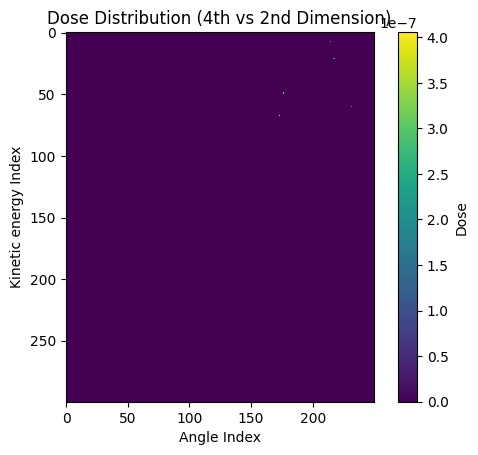

In [42]:
# plot the image of the fourth vs second dimension, use transparent or white color for zero values
plt.imshow(page.data[0, 0, 0, :, :], cmap='viridis', interpolation='nearest')
plt.colorbar(label='Dose')
plt.title('Dose Distribution (4th vs 2nd Dimension)')
plt.xlabel('Angle Index')
plt.ylabel('Kinetic energy Index')
plt.show()

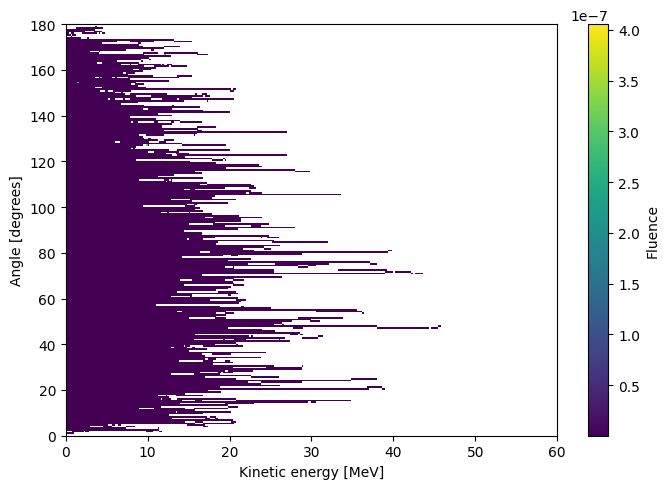

In [ ]:
# Plot using axis values for X (axis 4) and Y (axis 5), with zeros transparent
import numpy as np
import matplotlib.pyplot as plt

# Extract 2D slice matching previous example
data2d = page.data[0, 0, 0, :, :]

# Axis values
x_axis = page.axis(axis_id=3)
y_axis = page.axis(axis_id=4)
x_vals = x_axis.data
y_vals = y_axis.data

# Mask zero values to make them transparent/white
masked = np.ma.masked_where(data2d == 0, data2d)
cmap = plt.cm.viridis.copy()
cmap.set_bad(color=(1, 1, 1, 0))  # transparent white for masked (zero) values

# Use pcolormesh with axis values; transpose to align x with axis 4
plt.figure(figsize=(7, 5))
pc = plt.pcolormesh(x_vals, y_vals, masked.T, shading='auto', cmap=cmap)
plt.colorbar(pc, label='Fluence')

plt.xlabel("Kinetic energy [MeV]")
plt.ylabel("Angle [degrees]")
plt.tight_layout()
plt.show()

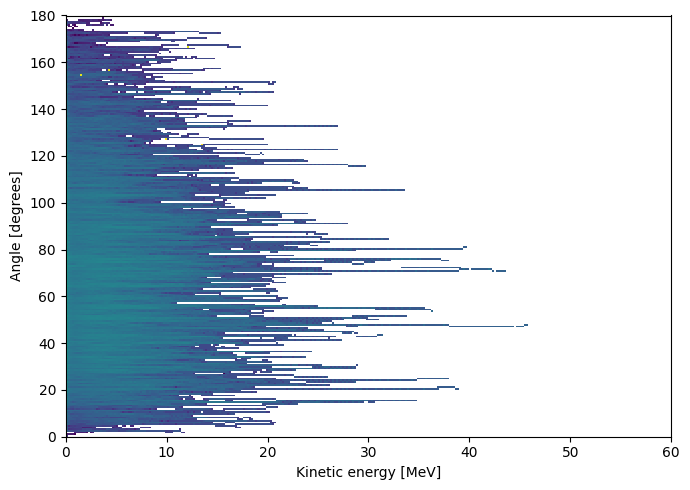

In [56]:
# Log-scale color plot using axis values (axes 4 vs 5)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


# Mask non-positive values (not plottable on log scale)
masked = np.ma.masked_where(data2d <= 0, data2d)
pos = masked.compressed()
if pos.size == 0:
    raise ValueError("No positive values to plot with LogNorm.")
vmin, vmax = pos.min(), pos.max()

# Transparent for masked values
cmap = plt.cm.viridis.copy()
cmap.set_bad(color=(1, 1, 1, 0))

def axis_label(ax_obj, fallback):
    name = getattr(ax_obj, 'name', None)
    unit = getattr(ax_obj, 'unit', None)
    label = name if name else fallback
    if unit:
        label += f" [{unit}]"
    return label

plt.figure(figsize=(7, 5))
pc = plt.pcolormesh(x_vals, y_vals, masked.T, shading='auto', cmap=cmap, norm=LogNorm(vmin=vmin, vmax=vmax))

plt.xlabel("Kinetic energy [MeV]")
plt.ylabel("Angle [degrees]")
plt.tight_layout()
plt.show()

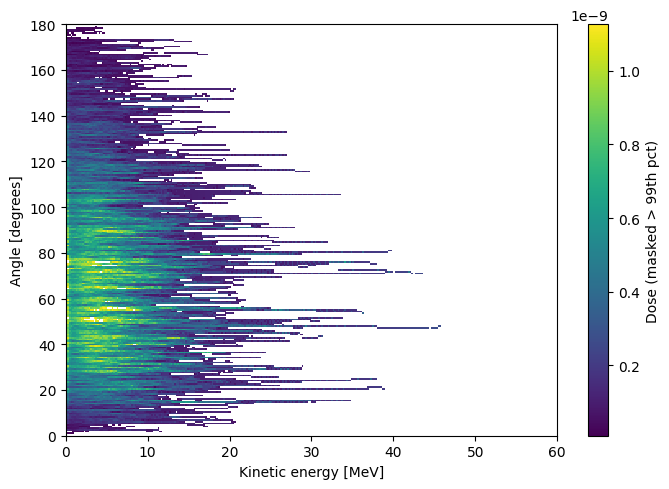

In [59]:
# Percentile-based hot-pixel masking plot (mask > percentile and zeros)
import numpy as np
import matplotlib.pyplot as plt

# Parameters
percentile = 99  # change if needed

# Extract 2D slice matching previous example
data2d = page.data[0, 0, 0, :, :]

# Axis values
x_axis = page.axis(axis_id=3)
y_axis = page.axis(axis_id=4)
x_vals = x_axis.data
y_vals = y_axis.data

# Compute threshold on positive values
pos = data2d[data2d > 0]
if pos.size == 0:
    raise ValueError("No positive values found to compute percentile threshold.")
thr = np.percentile(pos, percentile)

# Mask zeros and values above threshold
masked_hot = np.ma.masked_where((data2d <= 0) | (data2d > thr), data2d)

# Transparent for masked values
cmap = plt.cm.viridis.copy()
cmap.set_bad(color=(1, 1, 1, 0))

plt.figure(figsize=(7, 5))
pc = plt.pcolormesh(x_vals, y_vals, masked_hot.T, shading='auto', cmap=cmap)
plt.colorbar(pc, label=f'Dose (masked > {percentile}th pct)')

plt.xlabel("Kinetic energy [MeV]")
plt.ylabel("Angle [degrees]")
plt.tight_layout()
plt.show()